# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Business problem
We have a dataset containing a large number of used cars (426K) and their features. The goal is to find out what features make a car more or less expensive? and finally as a result give some clear recommendations to our client (a used car dealership) on what drivers value in a used car.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In order to identify any quality issues, I explored the dataset to understand the columns and the data contained within each column.
The vehicles.csv dataframe contains 426880 records and features 18 features.
There are two int64 columns,two float64 columns, and 14 object columns.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### All steps for data preparation:

1. Load data

2. Shape, size, data info, columns

3. Duplicated values

4. Drop unwanted rows and columns

5. Missing values

In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

### Load data

In [261]:
df = pd.read_csv('data/vehicles.csv')
df.head(50)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


### shape, size, data info, columns

In [262]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [263]:
check(df)

,column,dtypes,nunique,sum_null
0,id,int64,426880,0
1,region,object,404,0
2,price,int64,15655,0
3,year,float64,114,1205
4,manufacturer,object,42,17646
5,model,object,29649,5277
6,condition,object,6,174104
7,cylinders,object,8,177678
8,fuel,object,5,3013
9,odometer,float64,104870,4400


In [264]:
def second_check(df):
    print(len(df.index))
    print(df.shape)
    print('_____________')
    print(df.describe())

In [265]:
second_check(df)

426880
(426880, 18)
_____________
                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


### duplicated values

In [266]:
df = df.drop_duplicates()

### drop unwanted rows and columns

The following features don't seem important: id, paint_color, VIN

In [267]:
# dropping id, paint_color, VIN, type,drive as discussed
df.drop(['id', 'paint_color', 'VIN'], axis=1, inplace=True)

The following features have a large number of missing and also seem less important:
type, drive

In [268]:
df.drop(['type', 'drive'], axis=1, inplace=True)

'size' feature seem important but about more than 2/3 of items are missing this feature, so decided to drop it.

In [269]:
# dropping high missing count columns: size
df.drop('size', axis=1, inplace=True)

In [270]:
check(df)

,column,dtypes,nunique,sum_null
0,region,object,404,0
1,price,int64,15655,0
2,year,float64,114,1205
3,manufacturer,object,42,17646
4,model,object,29649,5277
5,condition,object,6,174104
6,cylinders,object,8,177678
7,fuel,object,5,3013
8,odometer,float64,104870,4400
9,title_status,object,6,8242


### Missing values

#### cylinders
This fiture is a combination of 'int' and 'str' and we need just the 'int' part


In [271]:
def cylinders_int (str_cyl):
    if isinstance(str_cyl, str):
        if 'cylinders' in str_cyl:
            return int(str_cyl.split(' ')[0])
    return np.nan

In [272]:
# make cylinders into an integer
df['cylinders'] = df.apply(lambda x: cylinders_int(x['cylinders']), 1)

####  filling missing cylinders fields 
As we see for 'cylinders' column, mean=6 and also mode=6 thus we decide to fill missing cylinder with value=6


In [273]:
df['cylinders'].mean()

5.968685458887311

In [274]:
df['cylinders'].mode()

0    6.0
Name: cylinders, dtype: float64

In [275]:
df['cylinders'].fillna(value=6, inplace=True)

In [276]:
df['cylinders'] = df['cylinders'].astype(int)

#### condition

In [277]:
print(df['condition'].unique())

[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']


In [278]:
df['condition'].value_counts(normalize=True)*100

good         48.048865
excellent    40.141074
like new      8.378169
fair          2.677865
new           0.516267
salvage       0.237760
Name: condition, dtype: float64

#### According to the percentages we have above, we fill in missing values based on percentages are showed above.


In [279]:
df[df['condition'].isnull()][:83571].fillna(value='good')
df[df['condition'].isnull()][83571:153213].fillna(value='excelent')
df[df['condition'].isnull()][153213:167664].fillna(value='like new')
df[df['condition'].isnull()][167664:172364].fillna(value='fair')
df[df['condition'].isnull()][172364:173582].fillna(value='new')
df[df['condition'].isnull()][173582:174104].fillna(value='salvage')

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,state
425145,northern WI,24995,2019.0,ford,escape,salvage,6,gas,39764.0,clean,automatic,wi
425146,northern WI,49995,2020.0,chevrolet,silverado 2500hd,salvage,6,gas,3741.0,clean,automatic,wi
425147,northern WI,27995,2013.0,chevrolet,silverado 1500,salvage,6,gas,72309.0,clean,automatic,wi
425148,northern WI,29995,2017.0,chevrolet,silverado 1500,salvage,6,gas,106165.0,clean,automatic,wi
425150,northern WI,7950,2006.0,ford,f-350 super duty,salvage,8,diesel,283034.0,clean,other,wi
...,...,...,...,...,...,...,...,...,...,...,...,...
426852,wyoming,6977,2011.0,honda,civic,salvage,6,gas,112396.0,clean,automatic,wy
426853,wyoming,4977,2005.0,nissan,altima,salvage,6,gas,154917.0,clean,automatic,wy
426854,wyoming,7977,2009.0,toyota,matrix,salvage,6,gas,142868.0,clean,automatic,wy
426855,wyoming,7477,2012.0,fiat,500,salvage,6,gas,64267.0,clean,manual,wy


In [283]:
# dropping rows that don't have year, manufacturer, model, fuel, odometer, title_status and transmission since these fields seem to have low missing counts and high importance.
df = df[df['year'].notna()]
df = df[df['manufacturer'].notna()]
df = df[df['model'].notna()]
df = df[df['fuel'].notna()]
df = df[df['odometer'].notna()]
df = df[df['title_status'].notna()]
df = df[df['transmission'].notna()]

In [292]:
check(df)

,column,dtypes,nunique,sum_null
0,region,int64,404,0
1,price,int64,14679,0
2,year,int64,107,0
3,manufacturer,int64,41,0
4,model,int64,21860,0
5,condition,int64,7,0
6,cylinders,int64,7,0
7,fuel,int64,5,0
8,odometer,int64,99827,0
9,title_status,int64,6,0


In [285]:

df['year'] = df['year'].astype(int)

df['odometer'] = df['odometer'].astype(int)

In [286]:
# categorical columns
categorical_columns=df.select_dtypes(include=['object']).columns

In [287]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df['manufacturer'] = le.fit_transform(df['manufacturer'])
df['model'] = le.fit_transform(df['model'])
df['condition'] = le.fit_transform(df['condition'])
df['fuel'] = le.fit_transform(df['fuel'])
df['title_status'] = le.fit_transform(df['title_status'])
df['transmission'] = le.fit_transform(df['transmission'])
df['state'] = le.fit_transform(df['state'])

In [288]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,state
27,16,33590,2014,14,17164,2,8,2,57923,0,2,1
28,16,22590,2010,7,17546,2,8,2,71229,0,2,1
29,16,39590,2020,7,17571,2,8,2,19160,0,2,1
30,16,30990,2017,38,20272,2,8,2,41124,0,2,1
31,16,15000,2013,13,8732,0,6,2,128000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,2019,30,13281,2,6,2,32226,0,2,50
426876,397,30590,2020,40,16586,2,6,2,12029,0,2,50
426877,397,34990,2020,6,21577,2,6,0,4174,0,2,50
426878,397,28990,2018,23,7828,2,6,2,30112,0,2,50


In [289]:
df.corr()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,state
region,1.000000,-0.001219,-0.005745,0.001121,-0.001443,-0.020806,-0.006385,-0.006259,-0.000993,-0.008921,-0.015970,-0.036064
price,-0.001219,1.000000,-0.004772,0.004079,-0.000675,-0.000223,0.002244,-0.000977,0.000872,-0.000773,-0.000810,0.000823
year,-0.005745,-0.004772,1.000000,0.027479,0.037794,0.099170,-0.119197,0.092929,-0.174467,-0.017178,0.157393,0.014164
manufacturer,0.001121,0.004079,0.027479,1.000000,-0.011694,-0.002040,-0.179722,-0.021607,0.000789,0.015290,0.001550,-0.013102
model,-0.001443,-0.000675,0.037794,-0.011694,1.000000,-0.018241,0.066571,0.056699,-0.003901,-0.015004,0.026521,0.005096
condition,-0.020806,-0.000223,0.099170,-0.002040,-0.018241,1.000000,-0.009110,-0.063289,-0.009012,-0.035430,-0.181793,0.031701
cylinders,-0.006385,0.002244,-0.119197,-0.179722,0.066571,-0.009110,1.000000,-0.070437,0.018861,-0.060179,0.071046,0.018476
fuel,-0.006259,-0.000977,0.092929,-0.021607,0.056699,-0.063289,-0.070437,1.000000,-0.066291,-0.013870,0.265766,-0.030330
odometer,-0.000993,0.000872,-0.174467,0.000789,-0.003901,-0.009012,0.018861,-0.066291,1.000000,0.008390,-0.124759,-0.002498
title_status,-0.008921,-0.000773,-0.017178,0.015290,-0.015004,-0.035430,-0.060179,-0.013870,0.008390,1.000000,-0.057481,0.004952


<Figure size 1440x1440 with 0 Axes>

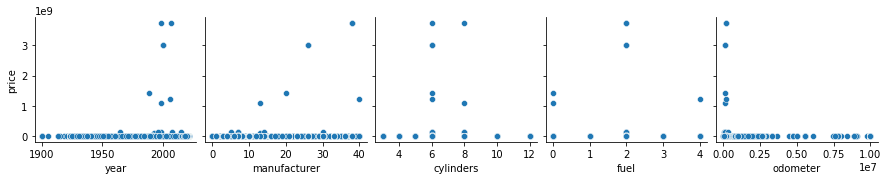

In [290]:
plt.figure(figsize = (20,20))
sns.pairplot(data = df , x_vars = ['year','manufacturer', 'cylinders', 'fuel', 'odometer'] , y_vars = ['price'])

# Findings

#### 1. 'Year' seem to be highest factor which is correlated to the 'price'
#### 2. Type of 'anufacturer' is impacting the 'price'
#### 3. Less miles on the car seem to be positively correlated to the 'price'
#### 4. Type of 'fuel' is impacting the 'price'
#### 5.  No. of 'cylinders' cars seem to be also impacting the 'price'

### Spliting

In [187]:
X = df.drop(['price'],axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

### Scaling

In [188]:
X_train_scaled = X_train
X_test_scaled = X_test

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Linear Regression

In [189]:
lr_model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print('MAE:', mean_absolute_error(y_test, lr_model.predict(X_test)))

MAE: 136883.74025684007


### Ridge

In [190]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
print('MAE:', mean_absolute_error(y_test, ridge_model.predict(X_test)))

MAE: 138789.06206321743


### GridSearchCV on Ridge's alpha parameter

In [191]:
gscv_ridge_model = GridSearchCV(Ridge(), param_grid = {'alpha': np.linspace(0, 1, 10)}, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose = 3).fit(X_train, y_train)
print('Best Parameters:', gscv_ridge_model.best_params_) 
print('MAE:', mean_absolute_error(y_test, gscv_ridge_model.predict(X_test)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'alpha': 1.0}
MAE: 138788.9327965861


### Lasso

In [192]:
lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)
print('MAE:', mean_absolute_error(y_test, lasso_model.predict(X_test)))

MAE: 138788.9138610376


### GridSearchCV on Lasso's alpha parameter

In [293]:
gscv_lasso_model = GridSearchCV(Lasso(), param_grid = {'alpha': np.linspace(0, 1, 10)}, scoring='neg_mean_absolute_error', cv=5, n_jobs=3, verbose = 3).fit(X_train, y_train)
print('Best Parameters:', gscv_lasso_model.best_params_) 
print('MAE:', mean_absolute_error(y_test, gscv_lasso_model.predict(X_test)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_des

Best Parameters: {'alpha': 1.0}
MAE: 138787.45836125838


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

After some modeling is accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this. . Our goal now is to review our findings and determine whether the earlier phases need revisitation and adjustment or if we have information of value to bring back to your client.
I tried Linear Regression, Ridge and Lasso models with different features combinations. MAE value for each model coming below:

#### Linear Regression: MAE = 138788.91

#### Ridge: MAE = 138789.06

#### GridSearchCV on Ridge's alpha parameter: MAE = 138788.93

#### Lasso: MAE = 138788.91

#### GridSearchCV on Lasso's alpha parameter: MAE = 138787.45

### According the MAE value, the best model is 'GridSearchCV on Lasso's alpha parameter' with MAE = 138787.45

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Summary of Insights:

- Older cars are slightly cheaper than new ones.

- Cars with 6 and 8 cylinders are more expensive.

- The type of manufacturer is one of the factors that affect car price.

- Almost less miles on the car means a more expensive car.

- The type of fuel can affect the car price.

